In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from time import time
from datetime import timedelta

In [6]:
X = pd.read_csv('USDA-0.2.csv')
y = X['pct_obese_adults13']

drop_cols = ['fips','pct_diabetes_adults13','pct_diabetes_adults08','pct_obese_adults13']
X.drop(drop_cols, axis=1, inplace=True)

In [7]:
cv = KFold(n_splits=5, shuffle=True, random_state=101)

In [8]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100, criterion='mae')

In [10]:
start = time()
oof_preds = cross_val_predict(rf, X, y, cv=cv, method='predict')
end = time()
diff = end - start
td = timedelta(seconds=diff)
print('Completed in {}'.format(td))
mae = mean_absolute_error(y, oof_preds)
print('MAE {:.4f}'.format(mae))

Completed in 0:14:33.479011
MAE 1.9817


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

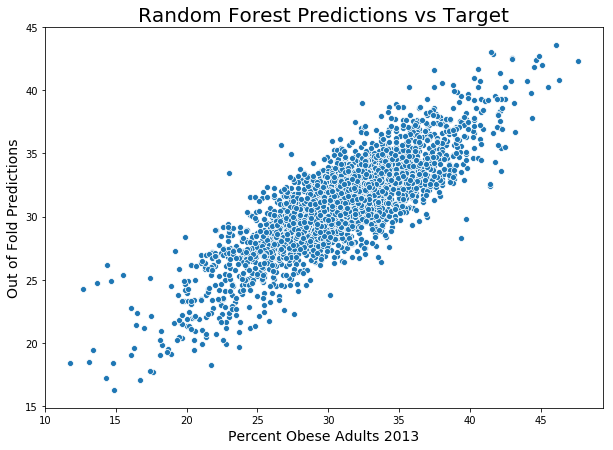

In [32]:
fig, ax = plt.subplots(figsize=(10,7))

sns.scatterplot(y, oof_preds, ax=ax)
ax.set_xlabel('Percent Obese Adults 2013', size=14)
ax.set_ylabel('Out of Fold Predictions', size=14)
ax.set_title('Random Forest Predictions vs Target',size=20)
plt.savefig('rf pred vs target',dpe=300)
plt.show()

In [19]:
errors = abs(y - oof_preds)

In [25]:
errors.name = 'Absolute Error'

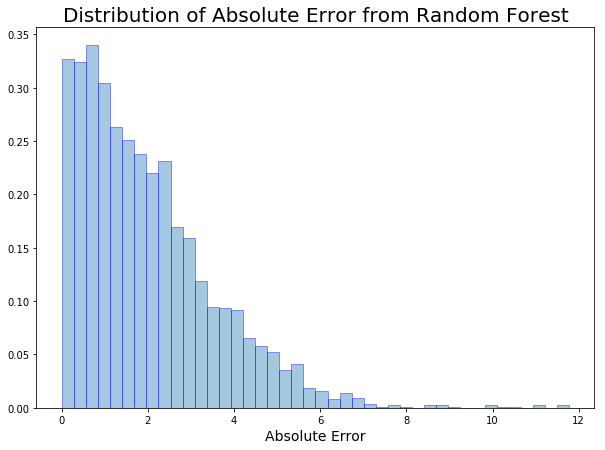

In [33]:
fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(errors, norm_hist=True, kde=False,hist_kws=dict(edgecolor='b'), ax=ax)
ax.set_title('Distribution of Absolute Error from Random Forest',size=20)
ax.set_xlabel('Absolute Error', size=14)
plt.savefig('dist_abs_error', dpi=300)
plt.show()